In [146]:
#imports
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn
from sklearn.metrics import r2_score 
from sklearn.naive_bayes import GaussianNB
import math

In [71]:
# loading in data and cleaning
df = pd.read_csv('drug200.csv')
df.head(15)

df.drop_duplicates()
df.dropna(axis=1)
df.rename(columns = {'Na_to_K':'Sodium-Potassium'}, inplace = True)

df.head(15)

,Age,Sex,BP,Cholesterol,Sodium-Potassium,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


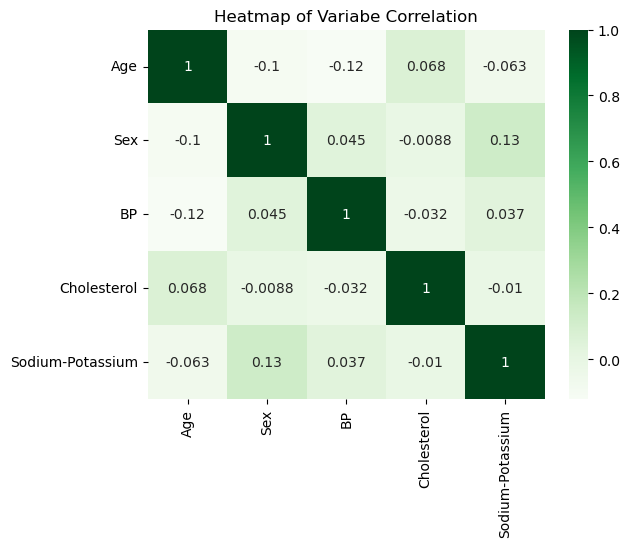

In [169]:
#heatmap
corr_df = pd.DataFrame(df.copy())

corr_df = corr_df.replace("F", 1)
corr_df = corr_df.replace("M", 0)
corr_df = corr_df.replace("HIGH", 4)
corr_df = corr_df.replace("NORMAL", 3)
corr_df = corr_df.replace("LOW", 2)
corr_df = corr_df.replace("DrugY", 10)
corr_df = corr_df.replace("drugC", 11)
corr_df = corr_df.replace("drugX", 12)

corr_df

correlation = corr_df.corr ()
ax=plt.axes()
seaborn.heatmap (correlation, annot=True, ax=ax, cmap="Greens")
ax.set_title("Heatmap of Variabe Correlation")
plt.show()


In [30]:
#division of data for data exploration

y = df[df['Drug'] == 'DrugY']
c = df[df['Drug'] == 'drugC']
x = df[df['Drug'] == 'drugX']

y_df = pd.DataFrame(y)
c_df = pd.DataFrame(c)
x_df = pd.DataFrame(x)

y_chol_low = y_df[y_df['Cholesterol'] == 'LOW']
y_chol_norm = y_df[y_df['Cholesterol'] == 'NORMAL']
y_chol_high = y_df[y_df['Cholesterol'] == 'HIGH']
x_chol_low = x_df[x_df['Cholesterol'] == 'LOW']
x_chol_norm = x_df[x_df['Cholesterol'] == 'NORMAL']
x_chol_high = x_df[x_df['Cholesterol'] == 'HIGH']
c_chol_low = c_df[c_df['Cholesterol'] == 'LOW']
c_chol_norm = c_df[c_df['Cholesterol'] == 'NORMAL']
c_chol_high = c_df[c_df['Cholesterol'] == 'HIGH']

[Text(0.5, 1.0, 'Frequency of Sodium-Potassium Rations across people needing different Drugs')]

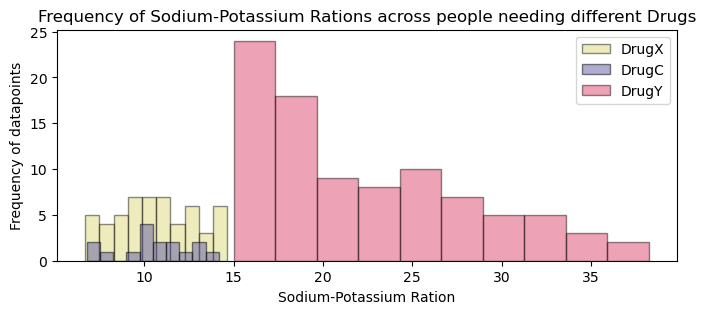

In [32]:
#data exploration
fig, axs = plt.subplots(1)
fig.set_figheight(3)
fig.set_figwidth(8)

axs.hist(x_df[['Sodium-Potassium']],
         alpha = 0.45, color = '#DBD56E', label="DrugX", ec="black")

axs.hist(c_df[['Sodium-Potassium']],
         alpha = 0.5, color = '#5F5AA2', label="DrugC", ec="black")
axs.hist(y_df[['Sodium-Potassium']],
         alpha = 0.45, color = '#D8315B', label="DrugY", ec="black")

axs.legend(loc='upper right', frameon=True)
axs.set(xlabel="Sodium-Potassium Ration")
axs.set(ylabel="Frequency of datapoints")
axs.set(title="Frequency of Sodium-Potassium Rations across people needing different Drugs")


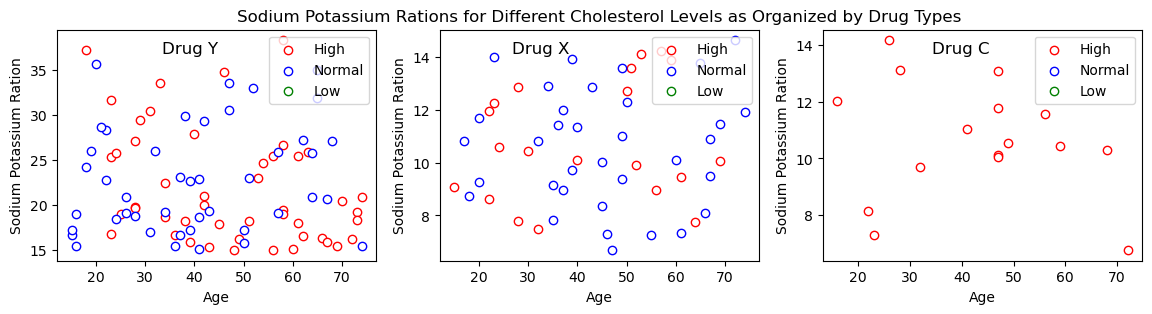

In [65]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(14)

axs[0].scatter(y_chol_high[['Age']], y_chol_high[['Sodium-Potassium']], color = '#ffffff', label="High", ec="red")
axs[0].scatter(y_chol_norm[['Age']], y_chol_norm[['Sodium-Potassium']], color = '#ffffff', label="Normal", ec="blue")
axs[0].scatter(y_chol_low[['Age']], y_chol_low[['Sodium-Potassium']], color = '#ffffff', label="Low", ec="green")
axs[0].set(xlabel="Age")
axs[0].set(ylabel="Sodium Potassium Ration")
axs[0].legend(loc='upper right', frameon=True)
plt.figtext(0.2, 0.8, "Drug Y", wrap=True, horizontalalignment='left', fontsize=12)

axs[1].scatter(x_chol_high[['Age']], x_chol_high[['Sodium-Potassium']], color = '#ffffff', label="High", ec="red")
axs[1].scatter(x_chol_norm[['Age']], x_chol_norm[['Sodium-Potassium']], color = '#ffffff', label="Normal", ec="blue")
axs[1].scatter(x_chol_low[['Age']], x_chol_low[['Sodium-Potassium']], color = '#ffffff', label="Low", ec="green")
axs[1].set(xlabel="Age")
axs[1].set(ylabel="Sodium Potassium Ration")
axs[1].legend(loc='upper right', frameon=True)
axs[1].set(title="Sodium Potassium Rations for Different Cholesterol Levels as Organized by Drug Types")
plt.figtext(0.45, 0.8, "Drug X", wrap=True, horizontalalignment='left', fontsize=12)


axs[2].scatter(c_chol_high[['Age']], c_chol_high[['Sodium-Potassium']], color = '#ffffff', label="High", ec="red")
axs[2].scatter(c_chol_norm[['Age']], c_chol_norm[['Sodium-Potassium']], color = '#ffffff', label="Normal", ec="blue")
axs[2].scatter(c_chol_low[['Age']], c_chol_low[['Sodium-Potassium']], color = '#ffffff', label="Low", ec="green")
axs[2].set(xlabel="Age")
axs[2].set(ylabel="Sodium Potassium Ration")
axs[2].legend(loc='upper right', frameon=True)
plt.figtext(0.75, 0.8, "Drug C", wrap=True, horizontalalignment='left', fontsize=12)

plt.show()


In [106]:
# data split

X = df.loc[:, ['Age', 'Sex', 'BP','Cholesterol', 'Sodium-Potassium']]
Y = df.loc[:, ['Drug']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = .75)

,Drug
71,DrugY
124,drugB
184,DrugY
97,DrugY
149,drugC
...,...
67,drugX
192,DrugY
117,drugX
47,drugC


In [126]:
#label encoding data from df for model
le = preprocessing.LabelEncoder()
sex_encoded=le.fit_transform(X_train['Sex'])
bp_encoded=le.fit_transform(X_train['BP'])
chol_encoded=le.fit_transform(X_train['Cholesterol'])
drug_encoded=le.fit_transform(Y_train['Drug'])
 
sex_encoded_test = le.fit_transform(X_test['Sex'])
bp_encoded_test = le.fit_transform(X_test['BP'])
chol_encoded_test = le.fit_transform(X_test['Cholesterol'])
drug_encoded_test = le.fit_transform(Y_test['Drug'])

In [190]:
#fitting the model

age = X_train['Age'].to_numpy()
na_k = X_train['Sodium-Potassium'].to_numpy()
age_test = X_test['Age'].to_numpy()
na_k_test = X_test['Sodium-Potassium'].to_numpy()

features=list(zip(age, sex_encoded, bp_encoded, chol_encoded, na_k))
features_edited = list(zip(age, sex_encoded, bp_encoded, chol_encoded, na_k))
model = GaussianNB()
model.fit(features_edited,drug_encoded)

features_test = list(zip(age_test, sex_encoded_test, bp_encoded_test, chol_encoded_test, na_k_test))
features_test_edited = list(zip(age_test, sex_encoded_test, bp_encoded_test, chol_encoded_test, na_k_test))
Y_pred = model.predict(features_test_edited)


In [192]:
#testing accuracy... improving model

print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))
rsquare = r2_score(Y_test, Y_pred)
print('Coefficient of determination: ', rsquare)

Accuracy:  0.86
Coefficient of determination:  0.6585365853658538


[[19  2  1  2  1]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 15]]


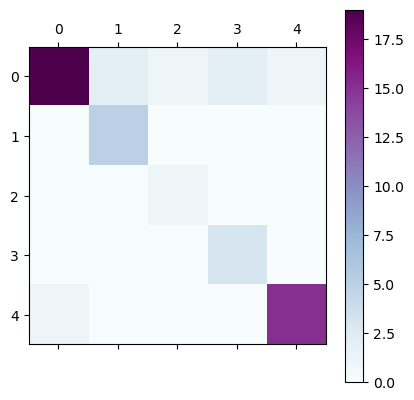

In [193]:
#confusion matrix

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
plt.show()
print(confusion_matrix)


def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap='BuPu'):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))


df_confusion = pd.crosstab(Y_test, Y_pred)
plot_confusion_matrix(df_confusion)
